# Weather Forecasting Using K Nearest Neighbour Algorithm

In this Simple Project we are going to predict rains for a particular day by using KNN Algorithm to train our model.This project is a basic one to test the accuracy and effectivity of KNN Algorithm.

In [17]:
import pandas as pd

## reading weather csv file containing all data

weather_data = pd.read_csv('weather.csv')

In [18]:
## A Highlight Of The Data

weather_data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
3,2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
4,2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


In [19]:
## This step includes making a new dataset taking 2 features (Humidity and Pressure)

weather_set = weather_data[['Humidity3pm','Pressure3pm','RainTomorrow']]
weather_set.head()

,Humidity3pm,Pressure3pm,RainTomorrow
0,84.0,1017.4,Yes
1,73.0,1016.4,Yes
2,86.0,1015.6,Yes
3,90.0,1011.8,Yes
4,74.0,1004.8,Yes


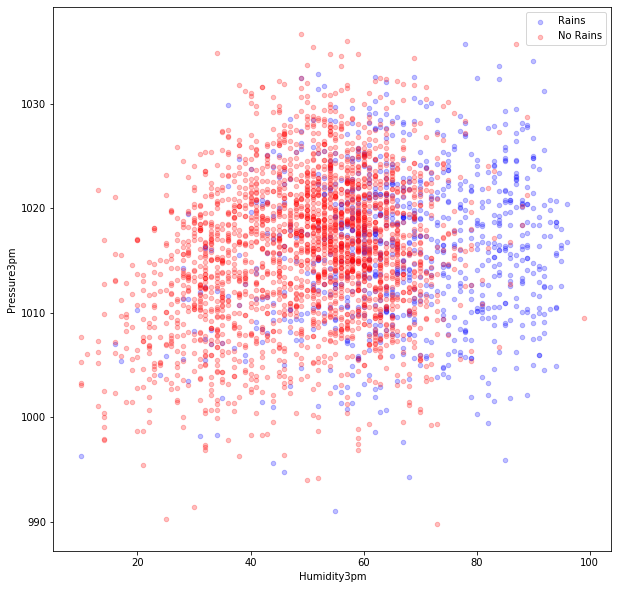

In [20]:
## Here we will be visualising our data for more clearity of the topic

import matplotlib.pyplot as plt
%matplotlib inline

## We will be using blue color to denote rain and red for no rain

fig,ax = plt.subplots(figsize = (10,10))
weather_set[weather_set['RainTomorrow']=='Yes'].plot.scatter(x = 'Humidity3pm',y = 'Pressure3pm',c = 'b',alpha = 0.25,ax = ax)
weather_set[weather_set['RainTomorrow']=='No'].plot.scatter(x = 'Humidity3pm',y = 'Pressure3pm',c = 'r',alpha = 0.25,ax = ax)
plt.legend(['Rains','No Rains'])

In [21]:
## Now Lets clean the data and drop off all vlaues that are NA(Not Available)

print('The Original Number of Training Examples : ',len(weather_set))
weather_clean_set = weather_set.dropna()
print('The New Number of Training Examples : ',len(weather_clean_set))

The Original Number of Training Examples :  3337
The New Number of Training Examples :  3309


In [22]:
## Now we start training our model. First we will split our data into test and train and then use KNN on it

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = weather_clean_set[['Humidity3pm','Pressure3pm']]
Y = weather_clean_set['RainTomorrow']

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 42)

## A Highlight of X_train and Y_train

x_train.head()

,Humidity3pm,Pressure3pm
228,25.0,1016.5
366,66.0,1016.2
869,40.0,1023.8
1277,54.0,1027.0
277,62.0,1015.9


In [23]:
y_train.head()

228      No
366      No
869     Yes
1277     No
277      No
Name: RainTomorrow, dtype: object

In [24]:
## Now we create the object of type KNeighborsClassifier to fit our model and then make predictions using x_test

neighbors = KNeighborsClassifier()
neighbors.fit(x_train,y_train)
y_predicitions = neighbors.predict(x_test)

## Now we print our predicitions
y_predicitions

array(['Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', '

In [25]:
## Now we are going to check how well did our model perform

accuracy_score(y_test,y_predicitions)

0.8091787439613527

The Maximum Accuracy is achieved at k = 38  with an accuracy of 82.2463768115942 %


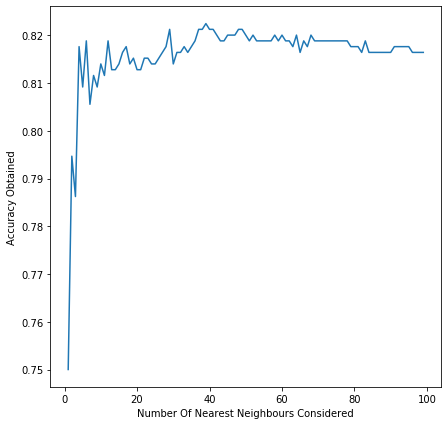

In [27]:
## But is this the best we can get ?. Can we get a better accuracy by taking more nearest points into consideration ?
score_accuracy = []
for k in range(1,100):
    neighbors = KNeighborsClassifier(n_neighbors=k)
    X = weather_clean_set[['Humidity3pm','Pressure3pm']]
    Y = weather_clean_set['RainTomorrow']
    x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 42)
    neighbors.fit(x_train,y_train)
    y_predicitions = neighbors.predict(x_test)
    score = accuracy_score(y_test,y_predicitions)
    score_accuracy.append(score)
    
## Let us plot the score_accuracy to see how the variation goes on when changing k

temp = [];
for i in range(1,100):
    temp.append(i)
plt.rcParams["figure.figsize"] = (7,7)
plt.plot(temp,score_accuracy)
plt.xlabel("Number Of Nearest Neighbours Considered")
plt.ylabel("Accuracy Obtained")

## The conclusion

print("The Maximum Accuracy is achieved at k =",score_accuracy.index(max(score_accuracy))," with an accuracy of",max(score_accuracy)*100,"%")

# WITH THIS WE COME TO THE END OF THIS PROJECT